# Diffusion equation worksheet (and PS 5 question 4)

Read through descriptions and code and then write a similar code for the problem set

## Heat conduction

Below solves the diffusion equation $$\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} $$ for the case of heat conduction (code is example 9.3 in Newman).

The setup is  a hundred equation grid points with the first and last fixed and 50 degree C and O deggree C.  This is meant to approximate the situation of heat conduction in a steel container of thickness 1 cm where one side is emersed in hot water at 50 degrees and the other in cold water at 0 degrees.  The diffusion coefficient D is taken to be the thermal diffusivity of steel which is $D = 4.25 \times 10^{-6}$ m$^2$ s$^{-1}$.  See Example 9.3 in Newman for more details.

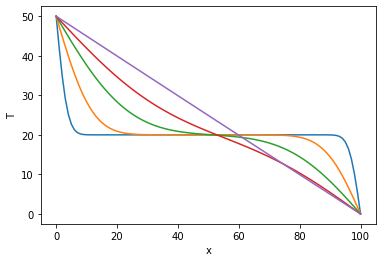

In [1]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity -- the diffusion coefficient (m^2/s)
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step  in seconds (needs to be such that h < a^2/2D for a stable solution, as found in class)
epsilon = h/1000  #just something small for singling out specific times

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T using our FTCS method for the diffusion equation
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T  #copies previous step into next step (and next step into previous step, but this doesn't matter)
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)

xlabel("x")
ylabel("T")
show()

The above shows that at early times (blue is 0.01 seconds), only the edges of steel are hot.  The heat slowly diffuses in until eventually, by ten seconds, there is a linear relation between the hot and cold edges.

## Diffusion from a source of heat  (like we discussed in class)

Taking the same code but putting steel in cold water on both sides and now heating up the center of the steel to 100 degrees and watching the heat response diffuse out across the width of the steel.

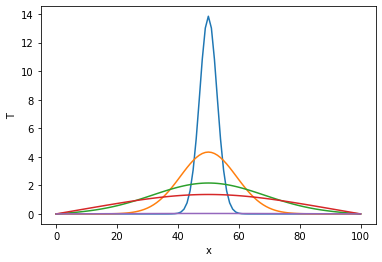

In [3]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity (m^2/s)
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step in seconds
epsilon = h/1000



Tcenter = 100.0    # temperature in Celcius of center of steel

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0:N+1] = 0  #boundary temperatures
T[N//2] = Tcenter
Tp = empty(N+1,float)
Tp[0:N+1] = 0
#Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)

xlabel("x")
ylabel("T")
show()

This is the Gaussian diffusion shown in class as heat diffuses away from center point.  With a bit more work you can show that each time is initially approximated with a Gaussian which is $$T(x) = \frac{A}{\sqrt{4\pi Dt}} \exp[-\frac{x^2}{4 D t}] $$ as stated in class, where A is some constant, until the diffusion reaches the edges heat is lost to the boundaries (the cold water).  It takes about ten seconds until the heat diffuses out of the edges and is lost to the bath on the boundaries.

## Now, time for the problem set question....

# PS 5, question 4

Write a program to solve the diffusion problem:
$$
{\partial^2 u \over \partial x^2} = {\partial u \over \partial t}
$$
for $u(x,t)$ with the boundary conditions
$$
u(0, t) = 200, \quad u(1,t) = 200, \quad u(x,0) = 0.
$$
where the domain is $0<x<1$, 
using the explicit forward differencing method described in text with $\Delta x = 0.2$ (Forward-Time Central-Space method in the book). Note that $\Delta x= a$ when comparing to the above. 

Plot the results for $u(0.4, t)$ for $0 < t < 0.4$ for two
different timesteps: $\Delta t = 0.04$ and 0.01  (Note that $\Delta t = h$ in the above).  How do these two
timesteps compare with the stability criterion for the forward
difference method?


### This is the same as the first heat-conduction from side problem, except the domain range, boundary conditions, initial conditions, N and h are different.  Also $D=1$.  Try to adjust the Newman code to calculate this case.

#### Hint
Remember our stability criteria $\Delta t < \Delta x^2/(2D)$ when interpretting results.

#### You might also consider trying this for smaller $\Delta x$ as 0.2 is sooooo large!  No reason to do 0.2 with a modern computer.